# 可视化训练日志-训练过程总体评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。



## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


'rm' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


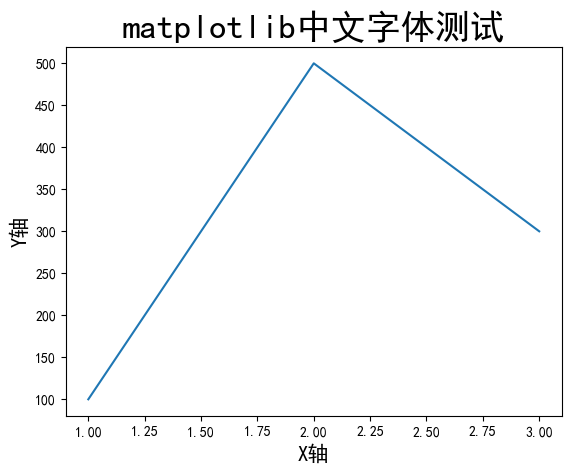

In [2]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [3]:
import os
os.chdir('mmsegmentation')

In [4]:
os.getcwd()

'd:\\chaosheng\\output\\MMSegmentation_Tutorials-20230816\\mmsegmentation'

## 导入工具包

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [6]:
# 日志文件路径
log_path = './work_dirs/LSR16F656-FastSCNN/20240104_105317/vis_data/scalars.json'

In [7]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [8]:
len(json_list)

360

In [9]:
eval(json_list[4])

{'lr': 0.11966340104343763,
 'data_time': 0.005445790290832519,
 'loss': 0.07299122326076031,
 'decode.loss_ce': 0.02342273257672787,
 'decode.acc_seg': 97.5091781616211,
 'aux_0.loss_ce': 0.012654308415949344,
 'aux_0.acc_seg': 96.5455093383789,
 'aux_1.loss_ce': 0.03691418264061212,
 'aux_1.acc_seg': 91.0265884399414,
 'time': 0.09272630214691162,
 'iter': 500,
 'memory': 1323,
 'step': 500}

In [10]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [11]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux_0.loss_ce,aux_0.acc_seg,aux_1.loss_ce,aux_1.acc_seg,time,iter,memory,step
0,0.119933,0.090426,0.153766,0.060682,91.808975,0.036869,90.973808,0.056215,79.220963,0.181272,100.0,3668.0,100.0
1,0.119866,0.005942,0.104259,0.035553,97.288689,0.021291,96.680031,0.047415,89.898491,0.094050,200.0,1324.0,200.0
2,0.119798,0.005755,0.094604,0.029814,94.368492,0.016673,94.061668,0.048117,73.658585,0.093333,300.0,1323.0,300.0
3,0.119731,0.005350,0.094967,0.032406,93.219284,0.018977,91.011528,0.043585,82.083015,0.093726,400.0,1323.0,400.0
4,0.119663,0.005446,0.072991,0.023423,97.509178,0.012654,96.545509,0.036914,91.026588,0.092726,500.0,1323.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.099839,0.005842,0.039771,0.013227,98.530266,0.006984,98.119766,0.019560,95.149658,0.094631,29600.0,1325.0,29600.0
296,0.099770,0.006916,0.039862,0.012006,98.265900,0.006709,97.745987,0.021148,88.604874,0.097331,29700.0,1324.0,29700.0
297,0.099701,0.007025,0.038509,0.012562,97.450806,0.006706,96.864990,0.019240,96.219467,0.098213,29800.0,1324.0,29800.0
298,0.099632,0.006941,0.043733,0.014612,98.485855,0.006996,97.950363,0.022126,92.374420,0.098336,29900.0,1323.0,29900.0


In [12]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,97.04,89.51,93.95,94.17,94.17,94.41,93.95,0.014849,0.029906,500.0
1,96.38,87.57,92.37,92.93,92.93,93.54,92.37,0.003099,0.013004,1000.0
2,97.18,89.91,93.62,94.41,94.41,95.26,93.62,0.003033,0.012339,1500.0
3,97.18,90.22,95.01,94.61,94.61,94.26,95.01,0.002935,0.011638,2000.0
4,96.91,88.95,92.82,93.81,93.81,94.92,92.82,0.002955,0.012440,2500.0
5,95.35,87.43,93.78,93.12,93.12,92.50,93.78,0.002665,0.012178,3000.0
6,97.26,90.36,94.55,94.69,94.69,94.83,94.55,0.002872,0.010871,3500.0
7,96.45,88.00,93.77,93.24,93.24,92.82,93.77,0.003281,0.013306,4000.0
8,96.94,89.14,93.15,93.93,93.93,94.78,93.15,0.003924,0.013041,4500.0
9,97.05,89.70,93.89,94.28,94.28,94.69,93.89,0.003133,0.012774,5000.0


## 导出训练日志表格

In [13]:
df_train.to_csv('图表/训练日志-训练集.csv', index=False)
df_test.to_csv('图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [14]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [15]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

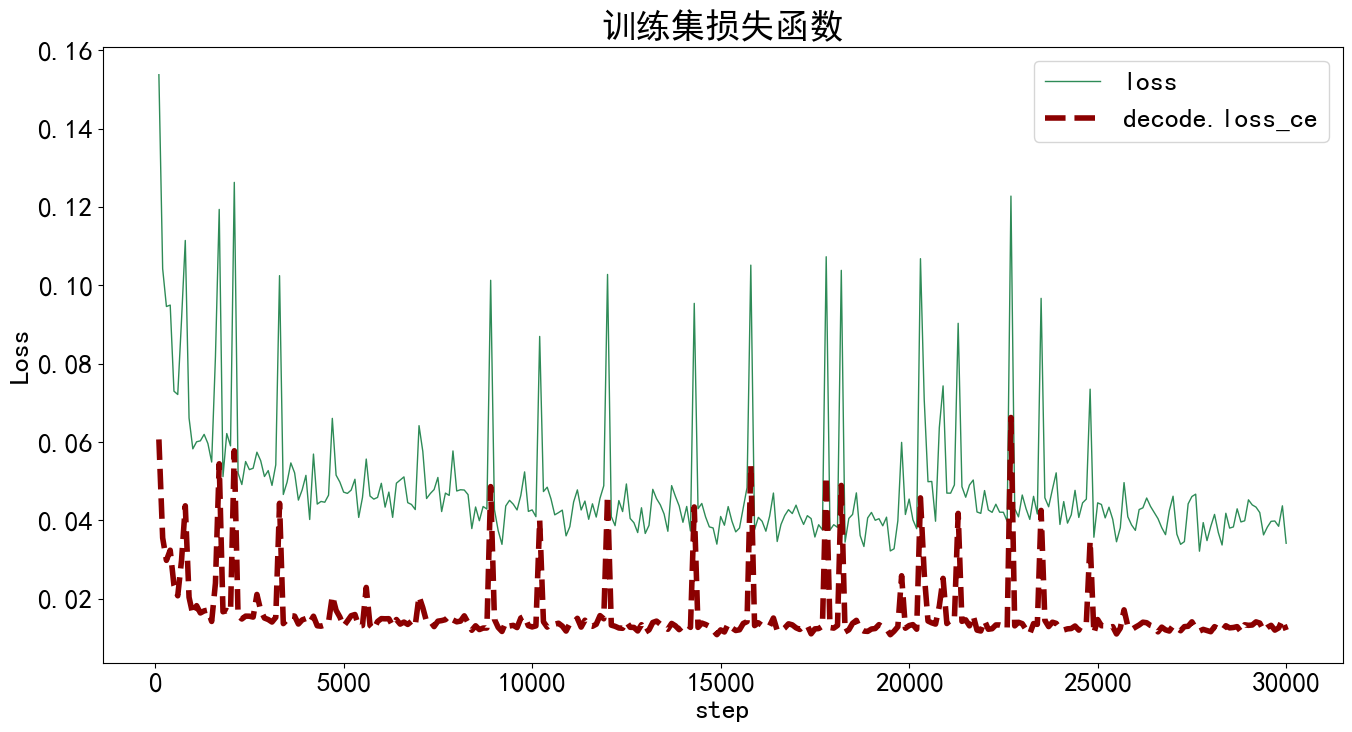

In [16]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [17]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

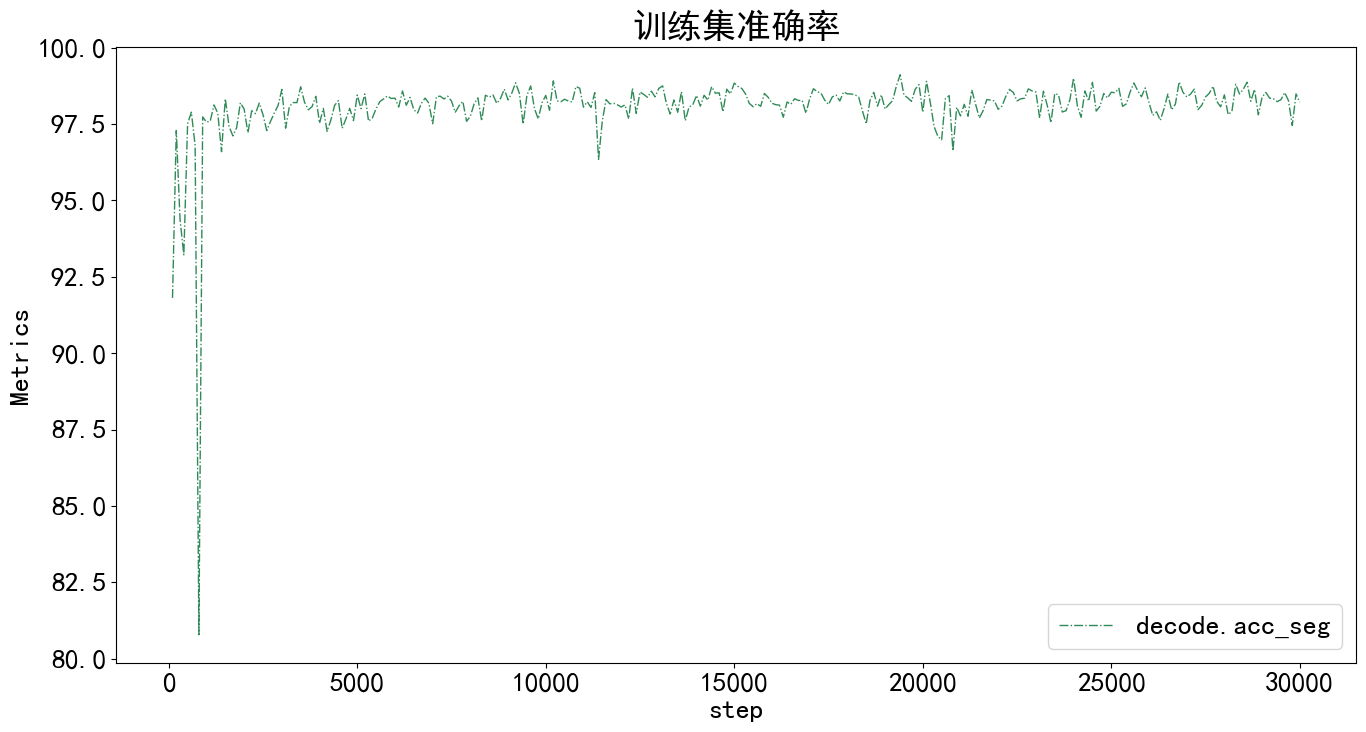

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [19]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [20]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

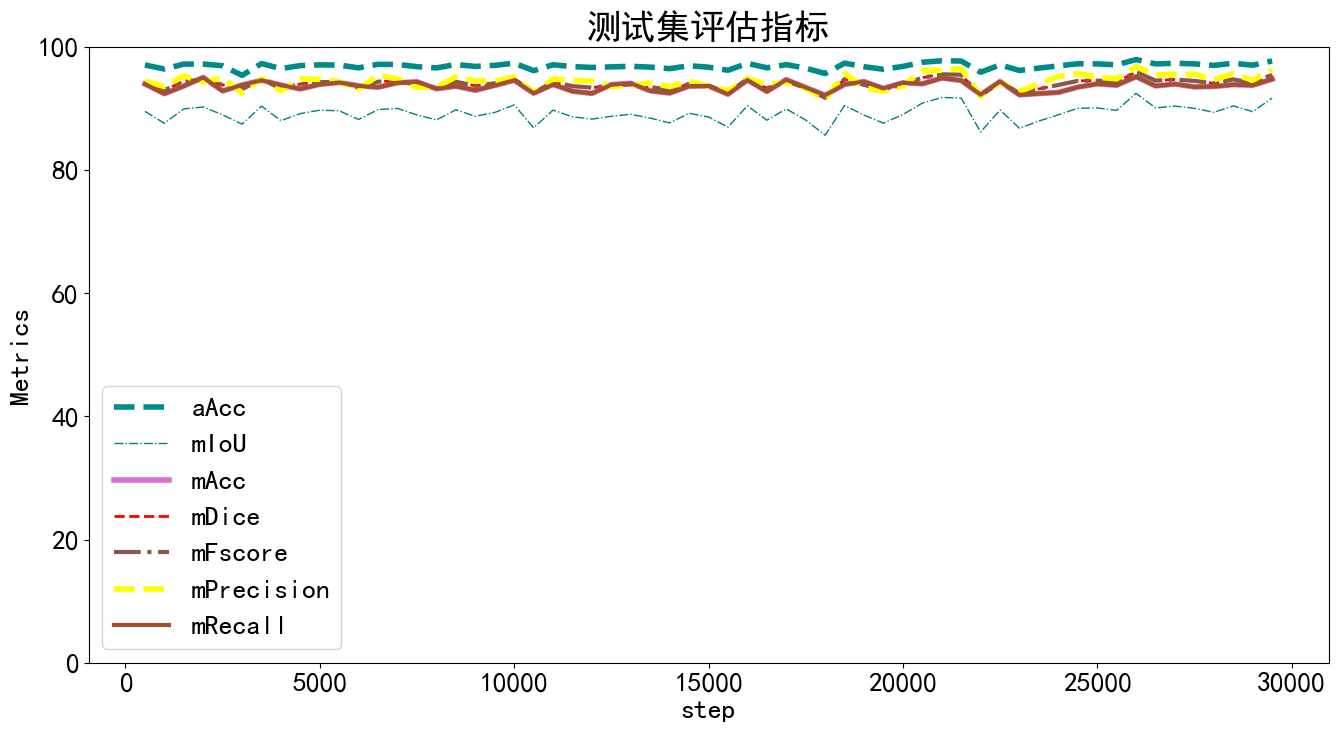

In [21]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()